In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
def Outliners_Cleaning(df):
  #Setting nutrition scores to positive values
  df['nutrition-score-fr_100g'] = df['nutrition-score-fr_100g'].abs()

  #Setting the sugar negative value to the group mean
  Cheese = df.loc[df['pnns_groups_2'] == 'Cheese']
  df.loc[df["sugars_100g"] < 0, "sugars_100g"] = np.nanmean(Cheese["sugars_100g"])

  #Setting sugar content above 100g to the sweets mean
  Sweets = df.loc[df['pnns_groups_2'] == 'Sweets']
  df.loc[df["sugars_100g"] > 100, "sugars_100g"] = np.nanmean(Sweets["sugars_100g"])

  #Setting of the two outliners to there respective means
  Appetizers = df.loc[df['pnns_groups_2'] == 'Appetizers']
  df.loc[df["fat_100g"] > 150, "fat_100g"] = np.nanmean(Appetizers["fat_100g"])
  Cereals = df.loc[df['pnns_groups_2'] == 'Cereals']
  df.loc[df["fat_100g"] > 100, "fat_100g"] = np.nanmean(Cereals["fat_100g"])

  #Setting of cholesterol to the chocolate product mean
  Chocolate_products = df.loc[df['pnns_groups_2'] == 'Chocolate products']
  df.loc[df["cholesterol_100g"] > 10, "cholesterol_100g"] = np.nanmean(Chocolate_products["cholesterol_100g"])

  #Setting of protein outliners to NaN values for later reprocessing
  df.loc[df["proteins_100g"]>90]
  df.loc[df["proteins_100g"]>25, "proteins_100g"] = np.nan

  #Setting to the salt mean
  Biscuits_and_cakes = df.loc[df['pnns_groups_2'] == 'Biscuits and cakes']
  df.loc[df["salt_100g"] > 200, "salt_100g"] = np.nanmean(Biscuits_and_cakes["salt_100g"])

  #Salt levels should be 100g per 100g for a packet of salt
  df.loc[df["salt_100g"] > 100, "salt_100g"] = 100

  #Setting to mean for the outliner, Centrum produce vitamin tablets so I am assuming the vitamin content is correct.
  Beverages = df.loc[df['pnns_groups_1'] == 'Beverages']
  df.loc[df["vitamin-a_100g"] > 0.07, "vitamin-a_100g"] = np.nanmean(Beverages["vitamin-a_100g"])

  #I am assuming vitamin C tabels do contain 100g of vitamin C. Again I will not change the value of the centrum tablets. I set the one remining outliner to the mean.
  df.loc[df["vitamin-c_100g"] == 7.50, "vitamin-c_100g"] = np.nanmean(Beverages["vitamin-c_100g"])
  
  #Setting the two outliners to there respective means
  df.loc[df["calcium_100g"] > 60, "calcium_100g"] = np.nanmean(Beverages["calcium_100g"])
  df.loc[df["calcium_100g"] > 30, "calcium_100g"] = np.nanmean(Biscuits_and_cakes["calcium_100g"])

  return df

In [165]:
def Mean_Filling(df, missing_columns):

  #Changing group NaN values to unknown
  df[['pnns_groups_1', 'pnns_groups_2']] = df[['pnns_groups_1', 'pnns_groups_2']].fillna('unknown')

  #Creation of dataframes for each of the pnns group 1 categories
  unknown = df.loc[df['pnns_groups_1'] == 'unknown']
  Beverages = df.loc[df['pnns_groups_1'] == 'Beverages']
  Sugary_snacks = df.loc[(df['pnns_groups_1'] == 'Sugary snacks') | (df['pnns_groups_1'] == 'sugary-snacks')]
  Fish_Meat_Eggs = df.loc[df['pnns_groups_1'] == 'Fish Meat Eggs']
  Milk_and_dairy_products = df.loc[df['pnns_groups_1'] == 'Milk and dairy products']
  Composite_foods = df.loc[df['pnns_groups_1'] == 'Composite foods']
  Cereals_and_potatoes = df.loc[(df['pnns_groups_1'] == 'Cereals and potatoes') | (df['pnns_groups_1'] == 'Cereals-and-potatoes')]
  Fruits_and_vegetables = df.loc[(df['pnns_groups_1'] == 'Fruits and vegetables') | (df['pnns_groups_1'] == 'fruits-and-vegetables')]
  Fat_and_sauces = df.loc[df['pnns_groups_1'] == 'Fat and sauces']
  Salty_snacks = df.loc[df['pnns_groups_1'] == 'Salty snacks']

  #For loops for mean filling for each category
  Unknown_Cleaning = unknown.copy()
  for i in unknown[missing_columns].columns[unknown[missing_columns].isnull().any(axis=0)]:
    Unknown_Cleaning[i].fillna(unknown[i].mean(),inplace=True)

  Beverages_Cleaning = Beverages.copy()
  for i in Beverages[missing_columns].columns[Beverages[missing_columns].isnull().any(axis=0)]:
    Beverages_Cleaning[i].fillna(Beverages[i].mean(),inplace=True)  

  Sugary_snacks_Cleaning = Sugary_snacks.copy()
  for i in Sugary_snacks[missing_columns].columns[Sugary_snacks[missing_columns].isnull().any(axis=0)]:
    Sugary_snacks_Cleaning[i].fillna(Sugary_snacks[i].mean(),inplace=True)

  Fish_Meat_Eggs_Cleaning = Fish_Meat_Eggs.copy()
  for i in Fish_Meat_Eggs[missing_columns].columns[Fish_Meat_Eggs[missing_columns].isnull().any(axis=0)]:
    Fish_Meat_Eggs_Cleaning[i].fillna(Fish_Meat_Eggs[i].mean(),inplace=True)

  Milk_and_dairy_products_Cleaning = Milk_and_dairy_products.copy()
  for i in Milk_and_dairy_products[missing_columns].columns[Milk_and_dairy_products[missing_columns].isnull().any(axis=0)]:
    Milk_and_dairy_products_Cleaning[i].fillna(Milk_and_dairy_products[i].mean(),inplace=True)
  
  Composite_foods_Cleaning = Composite_foods.copy()
  for i in Composite_foods[missing_columns].columns[Composite_foods[missing_columns].isnull().any(axis=0)]:
    Composite_foods_Cleaning[i].fillna(Composite_foods[i].mean(),inplace=True)

  Cereals_and_potatoes_Cleaning = Cereals_and_potatoes.copy()
  for i in Cereals_and_potatoes[missing_columns].columns[Cereals_and_potatoes[missing_columns].isnull().any(axis=0)]:
    Cereals_and_potatoes_Cleaning[i].fillna(Cereals_and_potatoes[i].mean(),inplace=True)

  Fruits_and_vegetables_Cleaning = Fruits_and_vegetables.copy()
  for i in Fruits_and_vegetables[missing_columns].columns[Fruits_and_vegetables[missing_columns].isnull().any(axis=0)]:
    Fruits_and_vegetables_Cleaning[i].fillna(Fruits_and_vegetables[i].mean(),inplace=True)

  Fat_and_sauces_Cleaning = Fat_and_sauces.copy()
  for i in Fat_and_sauces[missing_columns].columns[Fat_and_sauces[missing_columns].isnull().any(axis=0)]:
    Fat_and_sauces_Cleaning[i].fillna(Fat_and_sauces[i].mean(),inplace=True)

  Salty_snacks_Cleaning = Salty_snacks.copy()
  for i in Salty_snacks[missing_columns].columns[Salty_snacks[missing_columns].isnull().any(axis=0)]:
    Salty_snacks_Cleaning[i].fillna(Salty_snacks[i].mean(),inplace=True)

  #Combining the data into one dataframe
  Cleaned_list = [Unknown_Cleaning, Beverages_Cleaning, Sugary_snacks_Cleaning, Fish_Meat_Eggs_Cleaning, Milk_and_dairy_products_Cleaning, Composite_foods_Cleaning, Cereals_and_potatoes_Cleaning, Fruits_and_vegetables_Cleaning, Fat_and_sauces_Cleaning, Salty_snacks_Cleaning]
  Cleaned_dataframes = pd.concat(Cleaned_list)

  return Cleaned_dataframes

In [166]:
def kNN(Experiment_DF):

  imputer = KNNImputer()
  imputed = imputer.fit_transform(Experiment_DF)
  df_imputed = pd.DataFrame(imputed, columns=Experiment_DF.columns)

  #Refill code column with leading zeros
  df_imputed['code'] = df_imputed['code'].astype(int)
  df_imputed['code'] = df_imputed['code'].apply(lambda x: '{0:0>13}'.format(x)) 

  return df_imputed

In [167]:
def Cleaning_Below_100(df):
  #Lowering of sugar content to obtain a total figure of less than 100g
  Sugary_snacks = df.loc[(df['pnns_groups_1'] == 'Sugary snacks') | (df['pnns_groups_1'] == 'sugary-snacks')]
  df.loc[(df["sugars_100g"]>50) & (df["Total"]>100), ["sugars_100g"]] = np.nanmean(Sugary_snacks["sugars_100g"])

  #Recalculation of total.
  df['Total'] = df['sugars_100g'] + df['fat_100g'] + df['cholesterol_100g'] + df['proteins_100g'] + df['salt_100g'] + df['vitamin-a_100g'] + df['vitamin-c_100g'] + df['calcium_100g'] 

  #Removal of sugar and cholesterol from packets of salt
  df.loc[(df["salt_100g"]>80) & (df["Total"]>100), ["cholesterol_100g", "sugars_100g"]] = 0
  
  #Recalculation of total.
  df['Total'] = df['sugars_100g'] + df['fat_100g'] + df['cholesterol_100g'] + df['proteins_100g'] + df['salt_100g'] + df['vitamin-a_100g'] + df['vitamin-c_100g'] + df['calcium_100g'] 

  #Lowering of fat and salt content to obtain a total figure of less than 100g
  df.loc[(df["fat_100g"]>34) & (df["Total"]>100), ["fat_100g"]] = np.nanmean(Sugary_snacks["fat_100g"])
  df.loc[(df["salt_100g"]>25) & (df["Total"]>100), ["salt_100g"]] = np.nanmean(Sugary_snacks["salt_100g"])    

  #Recalculation of total.
  df['Total'] = df['sugars_100g'] + df['fat_100g'] + df['cholesterol_100g'] + df['proteins_100g'] + df['salt_100g'] + df['vitamin-a_100g'] + df['vitamin-c_100g'] + df['calcium_100g'] 

  #Removing sugar, fat and salt from vitamin products    
  df.loc[(df["vitamin-c_100g"]>80) & (df["Total"]>100), ["sugars_100g", "fat_100g", "salt_100g"]] = 0

  #Recalculation of total.
  df['Total'] = df['sugars_100g'] + df['fat_100g'] + df['cholesterol_100g'] + df['proteins_100g'] + df['salt_100g'] + df['vitamin-a_100g'] + df['vitamin-c_100g'] + df['calcium_100g']       

  #Removing cholestrol, proteins and vitamin A from vitamin C products
  df.loc[(df["vitamin-c_100g"]>80) & (df["Total"]>100), ["cholesterol_100g", "proteins_100g", "vitamin-a_100g"]] = 0

  #Recalculation of total.
  df['Total'] = df['sugars_100g'] + df['fat_100g'] + df['cholesterol_100g'] + df['proteins_100g'] + df['salt_100g'] + df['vitamin-a_100g'] + df['vitamin-c_100g'] + df['calcium_100g']     

  #Pnns groups have also been filled with 0, so I need to convert them back to "unknown"    
  df.loc[(df["pnns_groups_1"] == 0), ["pnns_groups_1"]] = "unknown"
  df.loc[(df["pnns_groups_2"] == 0), ["pnns_groups_2"]] = "unknown"  

  return df                                                                   

In [168]:
Food_Facts = pd.read_csv("/content/drive/MyDrive/openfoodfacts.csv",sep='\t', low_memory=False)
Food_Facts.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
Food_Facts.shape

(320772, 162)

In [170]:
pd.set_option("display.max_rows", None)
Food_Facts.isnull().sum()

code                                              23
url                                               23
creator                                            2
created_t                                          3
created_datetime                                   9
last_modified_t                                    0
last_modified_datetime                             0
product_name                                   17762
generic_name                                  267977
quantity                                      215953
packaging                                     241812
packaging_tags                                241811
brands                                         28412
brands_tags                                    28420
categories                                    236362
categories_tags                               236383
categories_fr                                 236361
origins                                       298582
origins_tags                                  

Colection of interesting data in a dataframe, I have focused on indicators with less than 200,000 NaN values 

In [171]:
Nutrition_Data = Food_Facts[["code", "product_name", "brands", "countries", "nutrition-score-fr_100g", "sugars_100g", "fat_100g", "cholesterol_100g", "proteins_100g", "salt_100g", "vitamin-a_100g", "vitamin-c_100g", "calcium_100g", "ingredients_from_palm_oil_n", "additives", "pnns_groups_1", "pnns_groups_2"]]

I am interested in products that can be bought in France 

In [172]:
Countries = Nutrition_Data.value_counts('countries')
print(Countries)

countries
US                                                                                                                                                                                                                                                                                                                                          169928
France                                                                                                                                                                                                                                                                                                                                       77292
en:FR                                                                                                                                                                                                                                                                                                                   

I create nine dataframes to include all data that is sold in France, and then combine them into a single dataframe

In [173]:
Nutrition_Data_1 = Nutrition_Data.loc[Nutrition_Data['countries'].str.contains ("France", na = False)]
Nutrition_Data_2 = Nutrition_Data.loc[Nutrition_Data['countries'].str.contains ("france", na = False)]
Nutrition_Data_3 = Nutrition_Data.loc[Nutrition_Data['countries'].str.contains ("en:FR", na = False)]
Nutrition_Data_4 = Nutrition_Data.loc[Nutrition_Data['countries'].str.contains ("Francia", na = False)]
Nutrition_Data_5 = Nutrition_Data.loc[Nutrition_Data['countries'].str.contains ("en:france", na = False)]
Nutrition_Data_6 = Nutrition_Data.loc[Nutrition_Data['countries'].str.contains ("Frankreich", na = False)]
Nutrition_Data_7 = Nutrition_Data.loc[Nutrition_Data['countries'].str.contains ("Frankrijk", na = False)]
Nutrition_Data_8 = Nutrition_Data.loc[Nutrition_Data['countries'].str.contains ("França", na = False)]
Nutrition_Data_9 = Nutrition_Data.loc[Nutrition_Data['countries'].str.contains ("Franciaország", na = False)]

Data = [Nutrition_Data_1, Nutrition_Data_2, Nutrition_Data_3, Nutrition_Data_4, Nutrition_Data_5, Nutrition_Data_6, Nutrition_Data_7, Nutrition_Data_8, Nutrition_Data_9]
Nutrition_Data_FR = pd.concat(Data)

In [174]:
Nutrition_Data_FR.head()

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,cholesterol_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2
46,0000000024600,Filet de bœuf,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
106,0000000036252,Lion Peanut x2,Sunridge,"France, US",22.0,57.5,20.00,0.012,2.50,0.09652,NaN,NaN,0.1,0.0,[ milk-chocolate-coating -> en:milk-chocolate...,unknown,unknown
136,0000000039259,Twix x2,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
138,0000000039529,Pack de 2 Twix,"Twix, Lundberg","France, US",NaN,NaN,4.17,NaN,6.25,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
182,0000005200016,lentilles vertes,Bertrand Lejeune,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[ lentilles-vertes -> fr:lentilles-vertes ] ...,Cereals and potatoes,Legumes


In [175]:
Nutrition_Data_FR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98969 entries, 46 to 303700
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   code                         98969 non-null  object 
 1   product_name                 91804 non-null  object 
 2   brands                       86946 non-null  object 
 3   countries                    98969 non-null  object 
 4   nutrition-score-fr_100g      61714 non-null  float64
 5   sugars_100g                  62829 non-null  float64
 6   fat_100g                     47973 non-null  float64
 7   cholesterol_100g             439 non-null    float64
 8   proteins_100g                64645 non-null  float64
 9   salt_100g                    62882 non-null  float64
 10  vitamin-a_100g               614 non-null    float64
 11  vitamin-c_100g               1328 non-null   float64
 12  calcium_100g                 2315 non-null   float64
 13  ingredients_fr

In [176]:
Nutrition_Data_FR.loc[Nutrition_Data_FR[['code']].duplicated(keep=False),:]

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,cholesterol_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2
250802,3700749302263,Bahia Goyave Blanche Litchi & Citron Vert,Bahia,"en:FR,France",1.0,8.00,0.10,NaN,0.10,0.030000,NaN,NaN,NaN,0.0,[ i-bah-boisson-d-goyave-litchi-citron-vert-s...,unknown,unknown
271826,5017764600228,"Kettle Vegetable Chips Beetroot, Golden Parsni...",Kettle,"en:FR,France",16.0,19.10,36.60,NaN,5.00,0.900000,NaN,NaN,NaN,0.0,[ legumes-en-proportions-variables -> fr:legu...,unknown,unknown
302321,8002503403052,Mozzrella di bufala,Ambrosi,"en:FR,France",15.0,0.70,22.00,NaN,17.00,0.500000,NaN,NaN,NaN,0.0,[ a-filee-au-lait-de-et-sel-ingedieng -> fr:a...,unknown,unknown
1050,0009542005948,Lindt Excellence 85% Cocoa Extra Dark,Lindt,"en:AU, en:france",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1346,0009800895250,Nutella,"Nutella,Ferrero","États-Unis, en:france, US",23.0,56.80,32.40,0.00000,5.41,0.103000,0.000000,0.00000,0.1080,0.0,[ sugar -> en:sugar ] [ palm-oil -> en:palm...,unknown,unknown
7308,0011200312121,Belvita petit déjeuner,lu,"en:RE, en:france",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7346,0011210000018,Tabasco Pepper Sauce,Tabasco,"United States, en:france",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[ distilled-vinegar -> en:distilled-vinegar ...,Fat and sauces,Dressings and sauces
7375,0011210009493,Tabasco,Tabasco,"Deutschland, en:france",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown
10366,0012000813313,Frappuccino,Starbucks,"United States, en:france",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beverages,Non-sugared beverages
12988,0016000264700,Crunchy Granola Bars,Nature Valley,"United States, en:france",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown


removal of duplicate codes

In [177]:
Nutrition_Data_FR.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [178]:
Indicators = Nutrition_Data_FR.value_counts('pnns_groups_1')
print(Indicators)

pnns_groups_1
unknown                    12474
Sugary snacks               9406
Fish Meat Eggs              6768
Beverages                   6594
Milk and dairy products     6425
Cereals and potatoes        6125
Composite foods             6047
Fruits and vegetables       4077
Fat and sauces              3796
Salty snacks                2124
fruits-and-vegetables        549
sugary-snacks                472
cereals-and-potatoes           2
dtype: int64


In [179]:
Indicators = Nutrition_Data_FR.value_counts('pnns_groups_2')
print(Indicators)

pnns_groups_2
unknown                             12474
One-dish meals                       4947
Biscuits and cakes                   3762
Sweets                               3428
Cereals                              3047
Cheese                               3031
Processed meat                       2905
Non-sugared beverages                2883
Dressings and sauces                 2612
Chocolate products                   2216
Fish and seafood                     2185
Alcoholic beverages                  2092
Milk and yogurt                      2058
Vegetables                           1772
Sweetened beverages                  1659
Appetizers                           1628
Fruit juices                         1531
Fruits                               1501
Meat                                 1357
Bread                                1316
Fats                                 1184
Breakfast cereals                    1111
Dairy desserts                        746
Sandwich            

In [180]:
Nutrition_Data_FR.describe()

,nutrition-score-fr_100g,sugars_100g,fat_100g,cholesterol_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n
count,61423.000000,62525.000000,47642.000000,414.000000,64319.000000,62583.000000,588.000000,1296.000000,2257.000000,53469.000000
mean,8.684223,13.430178,13.334592,0.041257,7.755193,1.160366,0.000629,0.125678,0.325431,0.069854
std,9.046300,19.085975,16.927384,0.536450,7.887239,4.309153,0.005579,2.801333,1.739675,0.258617
min,-15.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.300000,0.000000,1.800000,0.080000,0.000060,0.012000,0.120000,0.000000
50%,9.000000,4.100000,6.800000,0.000000,6.000000,0.558800,0.000120,0.020000,0.130000,0.000000
75%,15.000000,17.800000,21.000000,0.005660,11.000000,1.244600,0.000465,0.030000,0.330000,0.000000
max,40.000000,105.000000,380.000000,10.900000,100.000000,211.000000,0.120000,100.000000,69.500000,2.000000


We see a few outliners in the data. The ones that appear most odd on first inspection are:
negative numbers and 
levels greater than 100g per 100g!

Boxplot to see outliners 

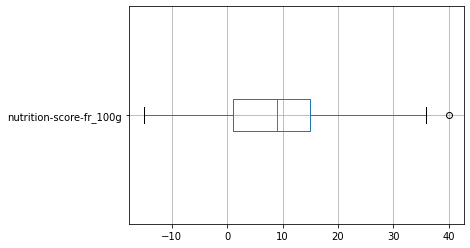

In [181]:
Nutrition_Data_FR.boxplot(column="nutrition-score-fr_100g", vert=False)
plt.show()

In [182]:
i = Nutrition_Data.loc[Nutrition_Data["nutrition-score-fr_100g"]==-15,:].index[0]
Nutrition_Data.iloc[i]

code                                                               3380390204408
product_name                                                        Pois chiches
brands                                                                   Primeal
countries                                                                 France
nutrition-score-fr_100g                                                    -15.0
sugars_100g                                                                  2.4
fat_100g                                                                     3.4
cholesterol_100g                                                             NaN
proteins_100g                                                               19.8
salt_100g                                                                   0.06
vitamin-a_100g                                                               NaN
vitamin-c_100g                                                               NaN
calcium_100g                

For vegetables, I can't replace the outliners with the mean value because it's a negative value. Nutrition values must be between 0 and 100 so I will take the absolute value of the data.

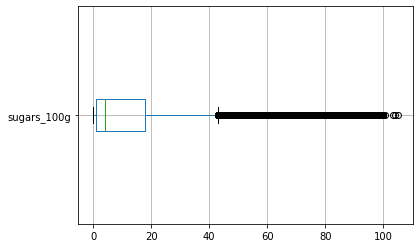

In [183]:
Nutrition_Data_FR.boxplot(column = "sugars_100g", vert=False)
plt.show()

In [184]:
Nutrition_Data_FR.loc[Nutrition_Data_FR["sugars_100g"]<0]

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,cholesterol_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2
14061,3161712000928,Caprice des dieux,Caprice des Dieux,France,15.0,-0.1,30.0,NaN,15.3,1.4,NaN,NaN,0.35,0.0,[ lait-de-vache -> fr:lait-de-vache ] [ lai...,Milk and dairy products,Cheese


In [185]:
Nutrition_Data_FR.loc[Nutrition_Data_FR["sugars_100g"]>100]

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,cholesterol_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2
19782,3229820787909,Sirop d'Agave brun bio,Bjorg,France,15.0,104.0,0.0,NaN,0.0,0.14000,NaN,NaN,NaN,0.0,[ 100-sirop-d-agave -> fr:100-sirop-d-agave ...,unknown,unknown
50907,3560070740338,Sirop d'agave,Carrefour Bio,France,NaN,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[ sirop-d-agave-concentre-issu-de-l-agricultu...,Sugary snacks,Sweets
65604,4016249015732,Sirop d agave pur,Allos,France,15.0,103.5,1.0,NaN,1.0,0.10000,NaN,NaN,NaN,NaN,NaN,unknown,unknown
79316,8718309253745,NaN,Sodastream,France,16.0,100.8,0.0,NaN,0.0,0.42672,NaN,NaN,NaN,NaN,NaN,unknown,unknown


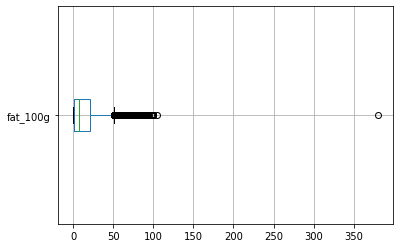

In [186]:
Nutrition_Data_FR.boxplot(column="fat_100g", vert=False)
plt.show()

In [187]:
Nutrition_Data_FR.loc[Nutrition_Data_FR["fat_100g"]>100]

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,cholesterol_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2
56168,3596710288755,mini choux goût fromage de chèvre - poivre,Auchan,France,35.0,22.7,380.0,NaN,0.0,9.33,NaN,NaN,NaN,1.0,[ matieres-grasses-vegetales-de-palme-et-de-p...,Salty snacks,Appetizers
76180,8032942610032,Graine de couscous moyen,La méditerranéa,France,-1.0,2.5,105.0,NaN,12.0,0.01,NaN,NaN,NaN,NaN,NaN,Cereals and potatoes,Cereals


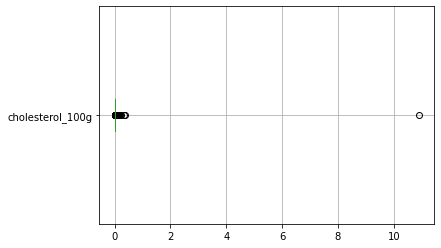

In [188]:
Nutrition_Data_FR.boxplot(column="cholesterol_100g", vert=False)
plt.show()

In [189]:
Nutrition_Data_FR.loc[Nutrition_Data_FR["cholesterol_100g"]>10]

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,cholesterol_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2
70565,5412038381481,Praliné Lait,Galler,France,25.0,50.3,37.3,10.9,5.7,0.2,NaN,NaN,NaN,0.0,[ chocolat -> fr:chocolat ] [ sucre -> fr:s...,Sugary snacks,Chocolate products


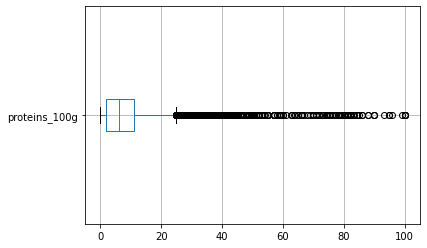

In [190]:
Nutrition_Data_FR.boxplot(column="proteins_100g", vert=False)
plt.show()

In [191]:
Nutrition_Data_FR.loc[Nutrition_Data_FR["proteins_100g"]>90]

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,cholesterol_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2
1707,0698502500571,Savarez - Jeu De Cordes,Savarez,France,-10.0,0.1,NaN,NaN,100.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1899,0883929140886,Harry Potter & The Deathly Hallows Radcliffe /...,Harry's,France,-10.0,0.0,NaN,NaN,100.0,0.00,NaN,NaN,NaN,NaN,NaN,unknown,unknown
16581,3183280016354,Le saunier de camargue,Le Saunier De Gamargue,France,20.0,0.5,NaN,NaN,96.0,100.00,NaN,NaN,NaN,NaN,NaN,unknown,unknown
28946,3257983765946,Edulcorant a l'extrait de stevia,Cora,France,0.0,6.9,NaN,NaN,93.1,0.08,NaN,NaN,NaN,NaN,NaN,unknown,unknown
37385,3286011051744,"Lingettes pocket pour visage et mains, biodégr...",Biolane,France,18.0,6.0,NaN,NaN,99.0,2.00,NaN,NaN,NaN,NaN,NaN,unknown,unknown
41701,3350033331259,Fromage blanc brebis,Monoprix,France,-1.0,2.9,NaN,NaN,94.7,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67731,5051889553625,Le Hobbit : La Bataille Des Cinq Armés - Versi...,Blu Ray,France,-10.0,0.0,NaN,NaN,100.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71757,6091035082004,Eau,Vital,France,24.0,100.0,NaN,NaN,100.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72223,7340055304214,Marshall - Major Noir,Sony,France,10.0,5.0,NaN,NaN,100.0,50.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75753,8009958000218,Mini Gressins,Linea Vecchio Mulino S R L,France,11.0,2.5,NaN,NaN,95.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


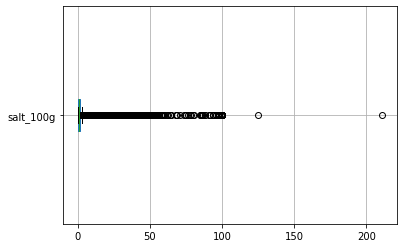

In [192]:
Nutrition_Data_FR.boxplot(column="salt_100g", vert=False)
plt.show()

In [193]:
Nutrition_Data_FR.loc[Nutrition_Data_FR["salt_100g"]>100]

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,cholesterol_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2
45155,3423720002432,Keeny Bio,Bio Soleil,France,22.0,26.7,23.0,NaN,6.3,211.0,NaN,NaN,NaN,0.0,[ farine-de-ble-t65 -> fr:farine-de-ble-t65 ...,Sugary snacks,Biscuits and cakes
46050,3445850070259,Sel de Guérande Label Rouge,Le guerandais,France,10.0,0.0,0.0,NaN,0.0,125.0,NaN,NaN,0.152,0.0,[ sel-marin-moulu -> fr:sel-marin-moulu ] [...,unknown,unknown


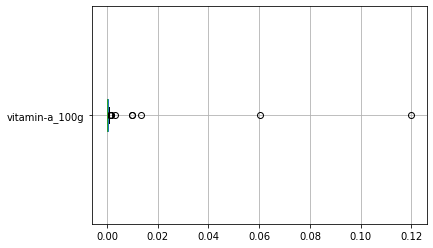

In [194]:
Nutrition_Data_FR.boxplot(column="vitamin-a_100g", vert=False)
plt.show()

In [195]:
Nutrition_Data_FR.loc[Nutrition_Data_FR["vitamin-a_100g"]>0.04]

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,cholesterol_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2
44180,3401528535864,Centrum Men,Centrum,France,NaN,NaN,NaN,NaN,NaN,NaN,0.0602,9.02,15.0,1.0,[ phosphate-dicalcique -> en:e341 -> exists ...,unknown,unknown
49859,3560070362486,"Multifruits, boisson",Produits Blancs,France,2.0,1.1,0.0,NaN,0.0,0.03,0.1200,0.02,NaN,0.0,[ eau -> fr:eau ] [ jus-et-purees-de-fruits...,Beverages,Non-sugared beverages


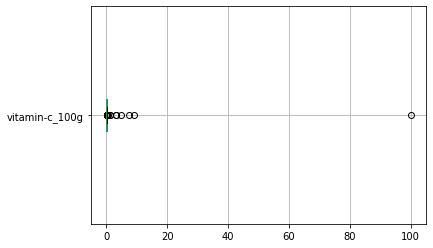

In [196]:
Nutrition_Data_FR.boxplot(column="vitamin-c_100g", vert=False)
plt.show()

In [197]:
Nutrition_Data_FR.loc[Nutrition_Data_FR["vitamin-c_100g"]>5]

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,cholesterol_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2
1875,0853471004387,"Coconut Liquid Water Enhancer, Original",Central lechera asturiana,France,0.0,0.0,0.0,NaN,0.0,0.0,NaN,7.50,NaN,0.0,[ coconut-and-purified-water -> en:coconut-an...,NaN,NaN
14051,3160921610300,Juvamine Vitamine C500 à croquer sans sucres,Juvamine,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,0.0,[ agent-de-charge -> fr:agent-de-charge ] [...,unknown,unknown
44180,3401528535864,Centrum Men,Centrum,France,NaN,NaN,NaN,NaN,NaN,NaN,0.0602,9.02,15.0,1.0,[ phosphate-dicalcique -> en:e341 -> exists ...,unknown,unknown


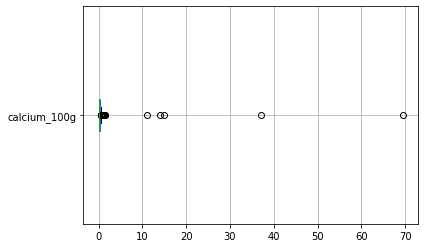

In [198]:
Nutrition_Data_FR.boxplot(column="calcium_100g", vert=False)
plt.show()

In [199]:
Nutrition_Data_FR.loc[Nutrition_Data_FR["calcium_100g"]>10]

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,cholesterol_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2
4075,20289126,Calcium + Vitamine D3,Optisana,"France,Allemagne",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1,0.0,[ acidifiants -> fr:acidifiants ] [ acide-c...,unknown,unknown
14036,3160920651304,Junior Vitamine C & Calcium goût Fraise à croquer,Juvamine,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.71,14.1,0.0,[ agent-de-charge -> fr:agent-de-charge ] [...,unknown,unknown
15241,3175680018939,Gerblé biscuit muesli avoine,Gerblé,France,6.0,15.0,17.0,NaN,7.8,0.63,NaN,NaN,37.0,0.0,[ farine-de-ble-48 -> fr:farine-de-ble-48 ] ...,Sugary snacks,Biscuits and cakes
44180,3401528535864,Centrum Men,Centrum,France,NaN,NaN,NaN,NaN,NaN,NaN,0.0602,9.02,15.0,1.0,[ phosphate-dicalcique -> en:e341 -> exists ...,unknown,unknown
45356,3428274140029,Milk'nGO,Lactel,France,18.0,10.8,0.8,NaN,2.1,0.10,NaN,NaN,69.5,0.0,[ lait-demi-ecreme -> fr:lait-demi-ecreme ] ...,Beverages,Sweetened beverages


In [200]:
Nutrition_Data_FR = Outliners_Cleaning(Nutrition_Data_FR)

In [201]:
Nutrition_Data_FR.drop_duplicates(subset=["product_name"], inplace=True, ignore_index=True)

Checking for and deleting data with no product name

In [202]:
Nutrition_Data_FR[Nutrition_Data_FR['product_name'].isna()]

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,cholesterol_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2
5,0000007020254,NaN,A&W,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown


In [203]:
Nutrition_Data_FR = Nutrition_Data_FR.dropna(subset=['product_name'])

In [204]:
#kNN function
Experiment_DF = Nutrition_Data_FR[["code",	"cholesterol_100g",	"proteins_100g", "salt_100g"]]

Experiment_DF = kNN(Experiment_DF)

In [205]:
#Mean Filling function

missing_columns = ['nutrition-score-fr_100g', 'sugars_100g',	'fat_100g']
Nutrition_Data_FR = Mean_Filling(Nutrition_Data_FR, missing_columns)

#missing_columns = ['nutrition-score-fr_100g', 'sugars_100g',	'fat_100g', "cholesterol_100g",	"proteins_100g", "salt_100g"]
#Nutrition_Data_FR_cleaning = Mean_Filling(Nutrition_Data_FR, missing_columns)

In [206]:
#Combining Filled Data
Filled_Data = Nutrition_Data_FR.drop(columns=["cholesterol_100g",	"proteins_100g", "salt_100g"])
Nutrition_Data_FR_cleaning = pd.merge(Filled_Data, Experiment_DF, how="left", on="code")

I still have NaN values for several categories, I will fill these with 0.

In [207]:
Cleaned_Nutrition_Data_FR = Nutrition_Data_FR_cleaning.fillna(value=0, axis=1)

Creation of a new column to check that all components add up to less than 100g per 100g for each product. 

In [208]:
Cleaned_Nutrition_Data_FR['Total'] = Cleaned_Nutrition_Data_FR['sugars_100g'] + Cleaned_Nutrition_Data_FR['fat_100g'] + Cleaned_Nutrition_Data_FR['cholesterol_100g'] + Cleaned_Nutrition_Data_FR['proteins_100g'] + Cleaned_Nutrition_Data_FR['salt_100g'] + Cleaned_Nutrition_Data_FR['vitamin-a_100g'] + Cleaned_Nutrition_Data_FR['vitamin-c_100g'] + Cleaned_Nutrition_Data_FR['calcium_100g']

In [209]:
Cleaned_Nutrition_Data_FR.loc[Cleaned_Nutrition_Data_FR["Total"]>100]

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2,cholesterol_100g,proteins_100g,salt_100g,Total
5,0000010187319,Mini Confettis,Alice Délice,France,14.000000,87.700000,12.424182,0.0000,0.0,0.000,0.0,0,unknown,unknown,0.014000,0.6000,0.010000,100.748182
554,0200024012298,Blode Hjerter,Hema,France,14.000000,85.000000,12.424182,0.0000,0.0,0.000,0.0,0,unknown,unknown,0.011000,4.1000,0.020000,101.555182
819,0855461003240,Aeroshot Energy Green Apple,"Aeroshot,AeroDesigns,AeroDesigns Inc.",France,10.082320,33.300000,0.000000,0.0000,0.0,0.000,0.0,[ cafeine -> fr:cafeine ] [ arome-pomme-nat...,unknown,unknown,0.001176,0.0000,84.700000,118.001176
929,19888701,Polo Original,Polo,France,15.000000,96.000000,12.424182,0.0000,0.0,0.000,0.0,0,unknown,unknown,0.000000,0.0000,0.000000,108.424182
1433,2017603199992,Meringues Fraise,Hema,France,20.000000,84.500000,12.424182,0.0000,0.0,0.000,0.0,0,unknown,unknown,0.040960,6.1000,0.300000,103.365142
1505,20276072,"Lord Nelson Zitrone Tee Getränk, Zitrone",Lord nelson,France,15.000000,91.000000,12.424182,0.0000,0.0,0.000,0.0,0,unknown,unknown,0.000000,0.0000,0.000000,103.424182
1819,20711115,Cassonade,Navarre,France,14.000000,100.000000,12.424182,0.0000,0.0,0.000,0.0,0,unknown,unknown,0.000000,0.0000,0.000000,112.424182
2197,26039237,Flocons Meringues Fantaisie,Gida,France,14.000000,89.000000,12.424182,0.0000,0.0,0.000,0.0,0,unknown,unknown,0.000000,0.0000,0.000000,101.424182
2773,3027030036486,Flan entremets parfum framboise,Dr Oetker,France,14.000000,90.000000,12.424182,0.0000,0.0,0.000,0.0,0,unknown,unknown,0.048000,0.0000,0.160000,102.632182
2998,3035626417243,Sel marin Herbamare,A. Vogel,France,10.082320,14.693276,0.000000,0.0000,0.0,0.000,0.0,[ sel-marin -> fr:sel-marin ] [ sel -> fr:s...,unknown,unknown,0.048000,0.9000,93.600000,109.241276


Function to make sure products have no more than 100g in total per 100g

In [210]:
Cleaned_Nutrition_Data_FR = Cleaning_Below_100(Cleaned_Nutrition_Data_FR)

Double check that no more products have a total more than 100g per 100g.

In [211]:
Cleaned_Nutrition_Data_FR.loc[Cleaned_Nutrition_Data_FR["Total"]>100]

,code,product_name,brands,countries,nutrition-score-fr_100g,sugars_100g,fat_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,ingredients_from_palm_oil_n,additives,pnns_groups_1,pnns_groups_2,cholesterol_100g,proteins_100g,salt_100g,Total


Save cleaned data to file

In [212]:
Cleaned_Nutrition_Data_FR.to_csv('/content/drive/MyDrive/cleanedfoodfacts.csv')